In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [2]:
train_data = pd.read_csv('D:\Imarti Excel files\Bigmart train.csv')
test_data = pd.read_csv('D:\Imarti Excel files\Bigmart-Test.csv')

In [3]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train_data.shape

(8523, 12)

In [5]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [8]:
datas=[train_data,test_data]

In [9]:
for data in datas:
    data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace = True)
    data['Outlet_Size'].fillna('Medium',inplace = True) 

In [10]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [11]:
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [12]:
y=train_data.Item_Outlet_Sales
Y=train_data.drop("Item_Outlet_Sales",axis=1)

In [13]:
Data=Y.append(test_data)

In [14]:
Data.shape

(14204, 11)

In [15]:
Data.shape

(14204, 11)

In [16]:
Data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,Medium,Tier 2,Supermarket Type1


In [17]:
Data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x18121754fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x1812176e700>,
 'boxes': [<matplotlib.lines.Line2D at 0x18121754c10>],
 'medians': [<matplotlib.lines.Line2D at 0x1812176ee20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1812177b1f0>],
 'means': []}

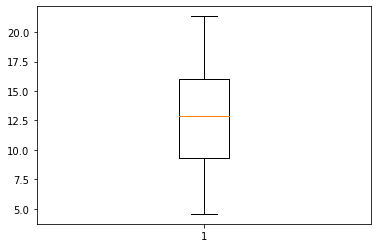

In [18]:
plt.boxplot(Data.Item_Weight)

In [19]:
Data.Item_Fat_Content.describe()

count       14204
unique          5
top       Low Fat
freq         8485
Name: Item_Fat_Content, dtype: object

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

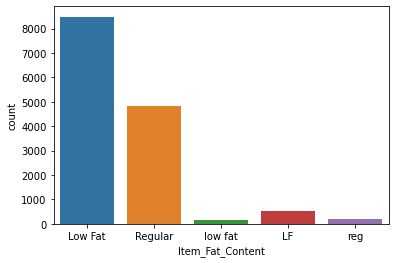

In [20]:
sns.countplot(Data.Item_Fat_Content)

In [21]:
Data.Item_Fat_Content=Data.Item_Fat_Content.replace(["low fat","LF"],"Low Fat")
Data.Item_Fat_Content=Data.Item_Fat_Content.replace(["reg","Regular"],"Regular")

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

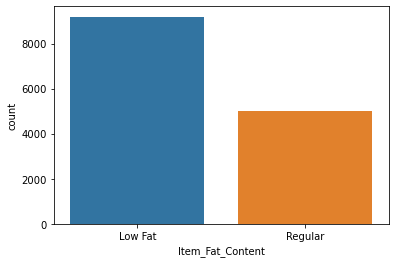

In [22]:
sns.countplot(Data.Item_Fat_Content)

In [23]:
Data.Item_Visibility.describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x18122feca90>,
 'caps': [<matplotlib.lines.Line2D at 0x18122ff91f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18122fec700>],
 'medians': [<matplotlib.lines.Line2D at 0x18122ff9910>],
 'fliers': [<matplotlib.lines.Line2D at 0x18122ff9ca0>],
 'means': []}

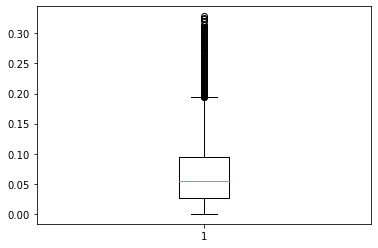

In [24]:
plt.boxplot(Data.Item_Visibility)

In [25]:
q3 = Data["Item_Visibility"].quantile(0.75)  
q1 = Data["Item_Visibility"].quantile(0.25)
IQR = q3 - q1
lower_limit = q1 - (IQR * 1.5)
upper_limit = q3 + (IQR * 1.5)
Data['Item_Visibility'] = np.where(Data['Item_Visibility'] >= upper_limit,upper_limit,np.where(Data['Item_Visibility'] <= lower_limit,lower_limit,Data['Item_Visibility']))

{'whiskers': [<matplotlib.lines.Line2D at 0x18123053e50>,
 'caps': [<matplotlib.lines.Line2D at 0x181230625b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18123053ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x18123062cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1812306f0a0>],
 'means': []}

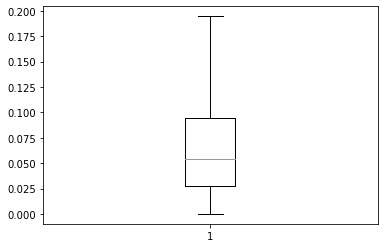

In [26]:
plt.boxplot(Data.Item_Visibility)

In [27]:
Data.Item_Identifier.isnull().sum()

0

<AxesSubplot:xlabel='Item_Identifier', ylabel='count'>

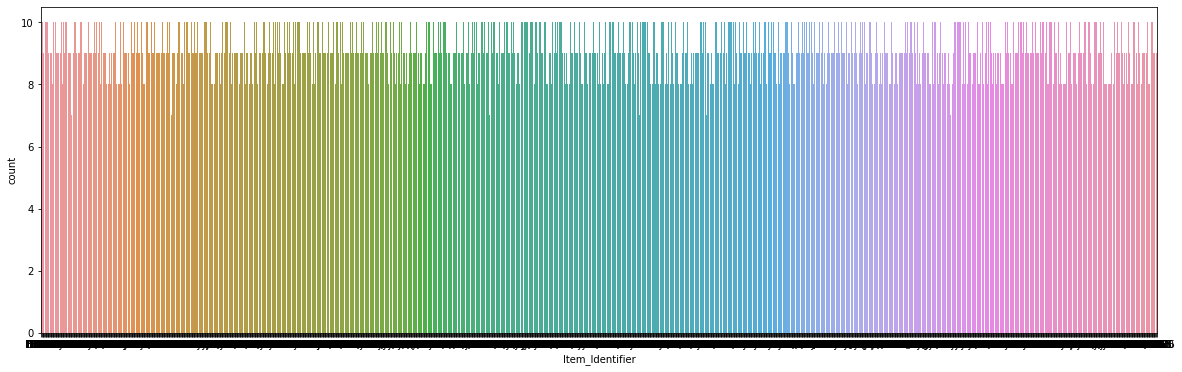

In [28]:
plt.figure(figsize=(20,6))
sns.countplot(x='Item_Identifier',data=Data)

In [29]:
Data.Item_Identifier.value_counts()

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

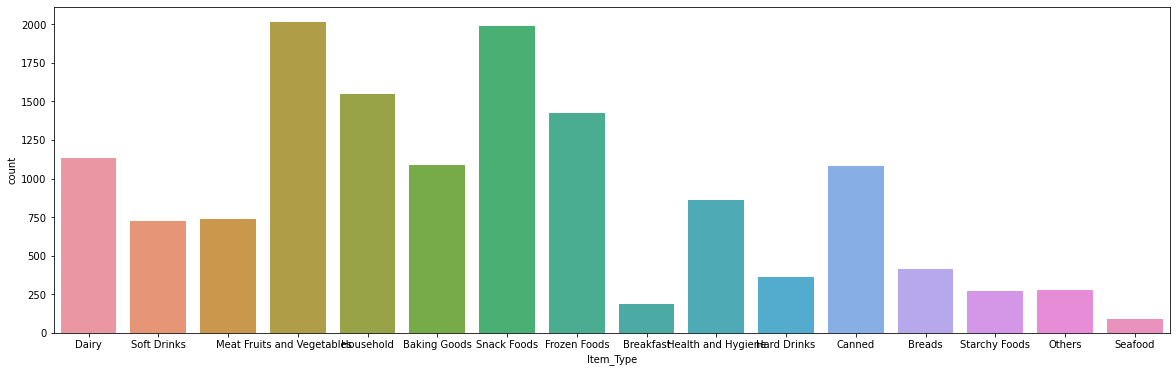

In [30]:
plt.figure(figsize=(20,6))
sns.countplot(x='Item_Type',data=Data)

In [31]:
Data.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x18123252c70>,
 'caps': [<matplotlib.lines.Line2D at 0x1812325d3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x181232528e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1812325daf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1812325de80>],
 'means': []}

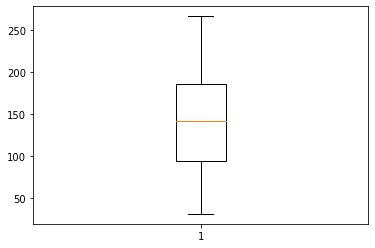

In [32]:
plt.boxplot(Data.Item_MRP)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

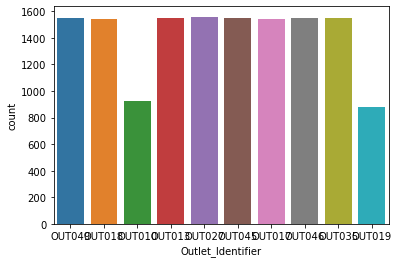

In [33]:
sns.countplot(Data.Outlet_Identifier)

In [34]:
Data.Outlet_Identifier.value_counts()

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

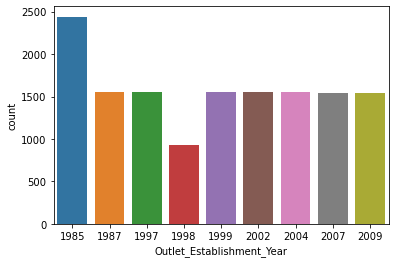

In [35]:
sns.countplot(Data.Outlet_Establishment_Year )

In [36]:
Data.Outlet_Establishment_Year.value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [37]:
Data.Outlet_Size.isnull().sum()

0

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

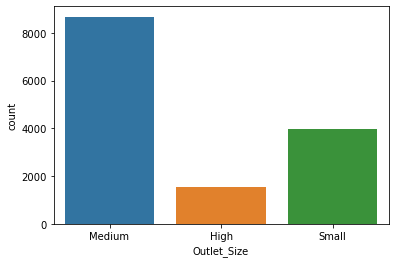

In [38]:
sns.countplot(Data.Outlet_Size)

In [39]:
Data.Outlet_Size.value_counts()

Medium    8671
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

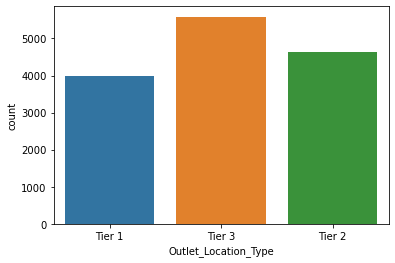

In [40]:
sns.countplot(Data.Outlet_Location_Type)

In [41]:
Data.Outlet_Location_Type.value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

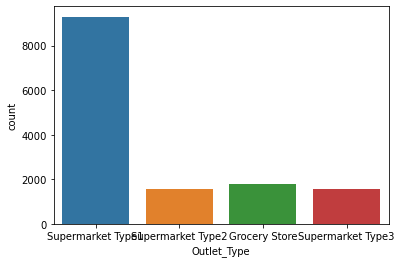

In [42]:
sns.countplot(Data.Outlet_Type)

In [43]:
Data.Outlet_Type.value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [44]:
Data=Data.drop(["Item_Identifier","Outlet_Identifier"],axis=1)

In [45]:
Data=Data.astype({"Outlet_Establishment_Year": str}, errors='ignore') 

In [46]:
dummy=pd.get_dummies(Data)

In [47]:
dummy.shape

(14204, 40)

In [48]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      14204 non-null  float64
 1   Item_Visibility                  14204 non-null  float64
 2   Item_MRP                         14204 non-null  float64
 3   Item_Fat_Content_Low Fat         14204 non-null  uint8  
 4   Item_Fat_Content_Regular         14204 non-null  uint8  
 5   Item_Type_Baking Goods           14204 non-null  uint8  
 6   Item_Type_Breads                 14204 non-null  uint8  
 7   Item_Type_Breakfast              14204 non-null  uint8  
 8   Item_Type_Canned                 14204 non-null  uint8  
 9   Item_Type_Dairy                  14204 non-null  uint8  
 10  Item_Type_Frozen Foods           14204 non-null  uint8  
 11  Item_Type_Fruits and Vegetables  14204 non-null  uint8  
 12  Item_Type_Hard Drin

In [49]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                14204 non-null  float64
 1   Item_Fat_Content           14204 non-null  object 
 2   Item_Visibility            14204 non-null  float64
 3   Item_Type                  14204 non-null  object 
 4   Item_MRP                   14204 non-null  float64
 5   Outlet_Establishment_Year  14204 non-null  object 
 6   Outlet_Size                14204 non-null  object 
 7   Outlet_Location_Type       14204 non-null  object 
 8   Outlet_Type                14204 non-null  object 
dtypes: float64(3), object(6)
memory usage: 1.6+ MB


In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler=MinMaxScaler()
print(scaler.fit(dummy))

MinMaxScaler()


In [52]:
scalerdata=scaler.transform(dummy)
print(scaler.transform(dummy))

[[0.28252456 0.0824886  0.92750715 ... 1.         0.         0.        ]
 [0.08127419 0.09909661 0.0720684  ... 0.         1.         0.        ]
 [0.77076511 0.08615251 0.46828841 ... 1.         0.         0.        ]
 ...
 [0.32420363 0.3779619  0.37119946 ... 1.         0.         0.        ]
 [0.63977374 0.         0.77815384 ... 1.         0.         0.        ]
 [0.29443287 0.53829732 0.20588425 ... 1.         0.         0.        ]]


In [53]:
X= pd.DataFrame(scalerdata)

In [54]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.282525,0.082489,0.927507,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.081274,0.099097,0.072068,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.770765,0.086153,0.468288,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.871986,0.000000,0.640093,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.260494,0.000000,0.095805,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [55]:
X.shape

(14204, 40)

In [56]:
X.tail()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
14199,0.353974,0.069376,0.467004,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
14200,0.181304,0.735022,0.585126,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
14201,0.324204,0.377962,0.371199,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
14202,0.639774,0.000000,0.778154,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
14203,0.294433,0.538297,0.205884,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [57]:
x=X.iloc[:8523]
Test=X.iloc[8523:]

In [58]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size = 0.8, test_size = 0.2,random_state =50)

<h3>Linear Regression</h3>

In [59]:
model=LinearRegression().fit(x_train,y_train)
print("Train Score =",model.score(x_train,y_train))
print("Test Score =",model.score(x_test,y_test))
predicted_y=model.predict(x_test)

Train Score = 0.563766758905303
Test Score = 0.5619360852367183


In [60]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,predicted_y,squared=False)

1119.0898178958619

<h3>Decision Regression</h3>

In [61]:
model1=DecisionTreeRegressor().fit(x_train,y_train)
print("Train Score =",model1.score(x_train,y_train))
print("Test Score =",model1.score(x_test,y_test))
predict_y=model1.predict(x_test)

Train Score = 1.0
Test Score = 0.18766568623070568


In [62]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,predict_y,squared=False)

1523.9250348873359

<h3>RandomForest Regression</h3>

In [63]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor(n_estimators = 100, random_state = 0)
model2.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [64]:
model2.score(x_train,y_train)

0.9371357052860705

In [65]:
model2.score(x_test,y_test)

0.5748195395453264

In [66]:
predic_y=model2.predict(x_test)

In [67]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,predic_y,squared=False)

1102.5108022159473

<h3>Gradient Boosting</h3>

In [68]:
model3=GradientBoostingRegressor(n_estimators = 100, random_state = 0)
model3.fit(x_train, y_train)

GradientBoostingRegressor(random_state=0)

In [69]:
model3.score(x_train,y_train)

0.6348128132944815

In [70]:
model3.score(x_test,y_test)

0.5956187241039059

In [71]:
pre_y=model3.predict(x_test)

In [72]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pre_y,squared=False)

1075.2061094937856

In [73]:
result=model3.predict(Test)

In [74]:
print(result)

[1636.83530525 1399.3387496   533.03868905 ... 1808.38093818 3738.97523619
 1282.17322955]


In [75]:
sabz=pd.DataFrame(result)

In [76]:
result1=pd.concat([test_data.Item_Identifier,test_data.Outlet_Identifier,sabz],axis=1)

In [77]:
result1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item_Identifier    5681 non-null   object 
 1   Outlet_Identifier  5681 non-null   object 
 2   0                  5681 non-null   float64
dtypes: float64(1), object(2)
memory usage: 133.3+ KB


In [78]:
result1.rename(columns={0:'Item_Outlet_Sales'}, inplace=True)

In [79]:
result1.Item_Outlet_Sales[result1.Item_Outlet_Sales<0]=-(result1.Item_Outlet_Sales)

C:\Users\Admin\AppData\Local\Temp/ipykernel_1144/642624030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result1.Item_Outlet_Sales[result1.Item_Outlet_Sales<0]=-(result1.Item_Outlet_Sales)


In [80]:
result1.to_csv('Desktop/BigMartHackathon.csv',index= False)

<h3>AdaBoosting</h3>

In [81]:
from sklearn.ensemble import AdaBoostRegressor
regress=AdaBoostRegressor(random_state=0, n_estimators=100)
regress.fit(x_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=0)

In [82]:
regress.score(x_train,y_train)

0.501569435851789

In [83]:
regress.score(x_test,y_test)

0.4853724577839019

In [84]:
prdic_y=regress.predict(x_test)

In [85]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,prdic_y,squared=False)

1212.9494922743363